# Model Training

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Algerian_forest_fire_clean.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
#drop date related columns
df.drop(['day','month','year'], axis=1,inplace=True)

In [7]:
## Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
# divide independant and dependant feature
x = df.drop('FWI', axis=1)
y = df['FWI']

In [11]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

## Feature engineering

### Feature Selection based on correlation



### 🔍 What is Multicollinearity?

**Multicollinearity** occurs when **two or more independent variables in a dataset are highly correlated** with each other. This means they carry **overlapping information**, making it difficult for a model to distinguish their individual effects on the target variable.



### ⚠️ Why is it a Problem?

Multicollinearity can lead to:

- 🔁 **Redundancy**: Multiple features provide the same information.
- 📉 **Unstable model coefficients**: Small changes in data can cause large changes in estimated coefficients.
- ❌ **Reduced interpretability**: It's harder to tell which feature actually influences the target.
- 📊 **Overfitting risk** in regression-based models.



### 🧪 How to Detect It

Common techniques to detect multicollinearity:

1. **Correlation Matrix**  
   Look for features with high pairwise correlation (e.g., > 0.8 or < -0.8).

2. **Variance Inflation Factor (VIF)**  
   A VIF > 5 (or sometimes 10) indicates high multicollinearity.

3. **Model performance checks**  
   If your model performs well but has unstable or counterintuitive coefficients, multicollinearity might be a cause.


### ✅ What Can You Do About It?

- ✂️ **Remove or combine** highly correlated variables.
- 🧪 **Use dimensionality reduction** (e.g., PCA).
- 🤖 **Choose models less sensitive to multicollinearity** (like tree-based models).

---

> 📌 *Tip: Multicollinearity doesn't always hurt model accuracy — but it can make the model harder to interpret. Always evaluate based on your project's goals!*


In [13]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [14]:
def correlation(dataset, threshold):
    """
    Returns a set of features that are highly correlated with others.

    Parameters:
    - dataset: pandas DataFrame
    - threshold: float, correlation threshold (e.g., 0.8)

    Returns:
    - Set of column names to consider removing due to high correlation.
    """
    col_corr = set()  # Stores column names to drop
    corr_matrix = dataset.corr(numeric_only=True)  # Compute correlation matrix

    for i in range(len(corr_matrix.columns)):        # Loop over each column
        for j in range(i):                           # Compare with previous columns only (to avoid duplicates)
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # If correlation is higher than the threshold
                colname = corr_matrix.columns[i]     # Keep the *current* column name
                col_corr.add(colname)                # Mark it for removal

    return col_corr



In [15]:
def find_correlated_features(df, threshold=0.85):
    """
    Identifies columns with high pairwise correlation and suggests dropping one from each pair.

    Parameters:
    - df: pandas DataFrame
    - threshold: float, correlation threshold (default = 0.85)

    Returns:
    - Set of column names to consider dropping.
    """
    corr_matrix = df.corr(numeric_only=True).abs()

    # Create upper triangle matrix of correlations (excluding self-correlation)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find columns where any correlation is above the threshold
    to_drop = {
        column
        for column in upper.columns
        if any(upper[column] > threshold)
    }

    return to_drop

In [16]:
correlated_features = find_correlated_features(x_train)
correlated_features

{'BUI', 'DC'}

In [17]:
correlated_features = correlation(x_train, 0.85)
correlated_features

{'BUI', 'DC'}

In [18]:
# lets drop correlated features
x_train.drop(correlated_features,axis=1,inplace=True)
x_test.drop(correlated_features,axis=1,inplace=True)

In [19]:
x_train.shape, x_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standarization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
x_train_scaled.shape, y_train.shape

((182, 9), (182,))

### Boxplot to understand the effect of scaler

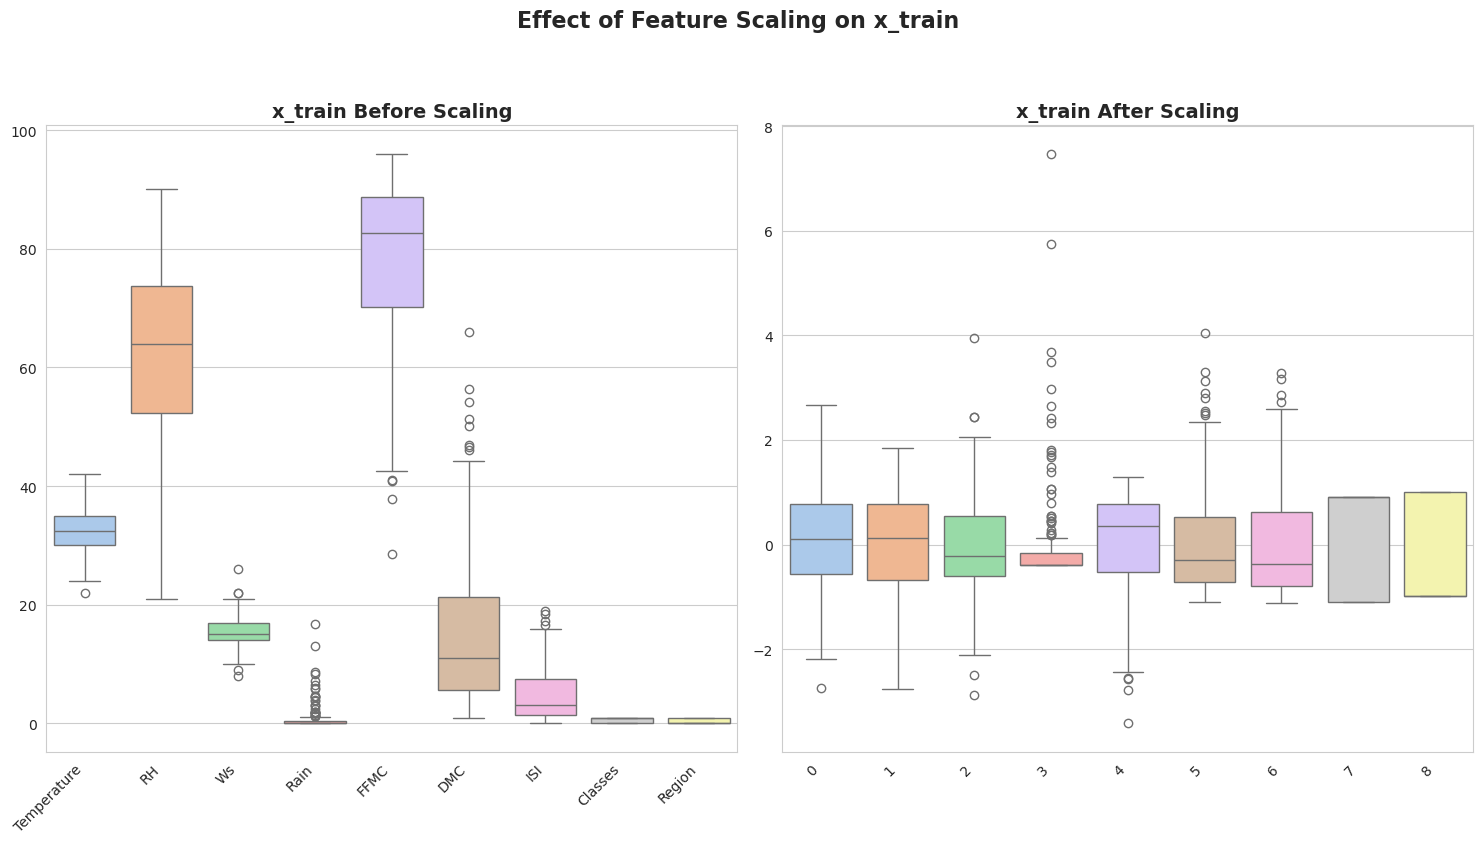

In [28]:
# Set the style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

# Boxplot before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train, palette="pastel")
plt.title("x_train Before Scaling", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')

# Boxplot after scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled, palette="pastel")
plt.title("x_train After Scaling", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')

# Improve layout
plt.suptitle("Effect of Feature Scaling on x_train", fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()


## Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [30]:
regressor = LinearRegression()

In [31]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [32]:
y_predict = regressor.predict(x_test_scaled)

In [37]:
mae = mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  0.5468236465249977


In [ ]:
score = r2_score(y_test,y_predict)
print('R2 Score: ', score)

R2 Score:  0.9847657384266952


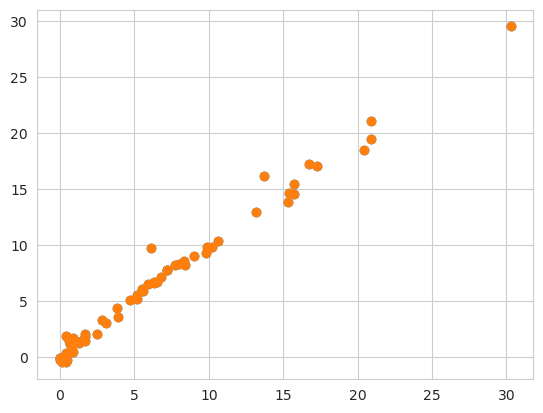

In [40]:
plt.scatter(y_test,y_predict)
plt.show()

## Lasso Regression



**Lasso Regression** is a regularized form of linear regression that adds a penalty based on the **absolute value of the coefficients**. It helps to simplify models by shrinking less important feature coefficients to **zero** — effectively performing **feature selection**.



### 🧮 Objective Function

Lasso minimizes:

$$
\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum |\beta_j|
$$

Where:

- $ \lambda $ controls the strength of the regularization.
- $ \beta_j $ are the model coefficients.
- The second term is the **L1 penalty**.


### ✅ Key Characteristics

- Encourages **sparse models** (some coefficients become exactly zero).
- Useful for **feature selection** in high-dimensional datasets.
- Helps prevent **overfitting**.


### 📌 When to Use Lasso?

- When you suspect that **some features are irrelevant**.
- When you want a **simpler model** that’s easier to interpret.
- When multicollinearity (correlated predictors) is an issue.



In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)


In [42]:
mae_lasso = mean_absolute_error(y_test,y_pred)
print("Mean Absolute error of Lasso model: ", mae_lasso)

r2_lasso = r2_score(y_test,y_pred)
print('R2 score of Lasso Model: ', r2_lasso)

Mean Absolute error of Lasso model:  1.1331759949144087
R2 score of Lasso Model:  0.9492020263112388


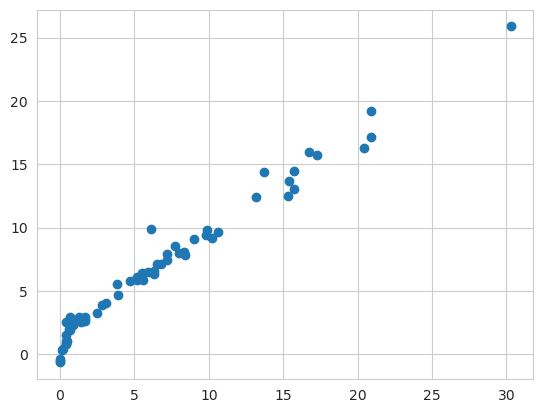

In [43]:
plt.scatter(y_test,y_pred)
plt.show()

## Cross Validation

**Cross-validation** is a resampling technique used to assess how well a machine learning model generalizes to unseen data. It helps prevent overfitting and ensures that your model’s evaluation is more robust.



### 📌 Why Use It?

- Provides a **more accurate** estimate of model performance.
- Reduces **variance** from a single train/test split.
- Ensures each data point gets to be in a test set at least once.



### 🔢 k-Fold Cross-Validation

This is the most common type of cross-validation:

1. Split the data into **k equal-sized folds**.
2. Train the model on **k−1 folds**, test on the remaining fold.
3. Repeat this process **k times**, changing the test fold each time.
4. Compute the **average performance metric** (e.g. accuracy, RMSE).


### ✅ What to Consider After Cross-Validation

Once cross-validation is complete, here are key insights to analyze:



#### 1. Average Score

- Use the **mean** of the cross-validation scores to estimate model performance.
- Example: Mean R², Accuracy, RMSE, etc.



#### 2. Variability of Scores

- Check the **standard deviation** of the scores across folds.
- High variability = the model is sensitive to different data subsets.


#### 3. Bias vs. Variance

| Observation                     | Possible Cause     |
|----------------------------------|--------------------|
| Low score on all folds           | High bias (underfitting)  |
| High variation across folds      | High variance (overfitting) |



#### 4. Model Selection & Tuning

- Compare multiple models using their **average cross-validation scores**.
- Use cross-validation to **tune hyperparameters** reliably.



#### 5. Feature Impact

- Rerun cross-validation after **removing or adding features** to assess impact.


#### 6. Final Model Training

- After choosing the best model, **retrain it on the full dataset** before making predictions or deploying.
---

## 🔍 Cross-Validated Lasso Regression (`LassoCV`)

`LassoCV` is a version of **Lasso Regression** that uses **cross-validation** to automatically find the best regularization strength (`alpha`).



### 📌 Why Use It?

- Automatically finds the **optimal alpha** (regularization parameter).
- Helps avoid **manual trial-and-error**.
- Improves **model robustness and generalization**.


### 🔢 How It Works

1. Define a set of `alpha` values.
2. For each `alpha`, train a Lasso model using **k-fold cross-validation**.
3. Select the `alpha` that minimizes the average **cross-validation error**.
4. Retrain the model on the **entire training set** using the best `alpha`.



In [53]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [55]:
lassocv.alpha_

0.05725391318234411

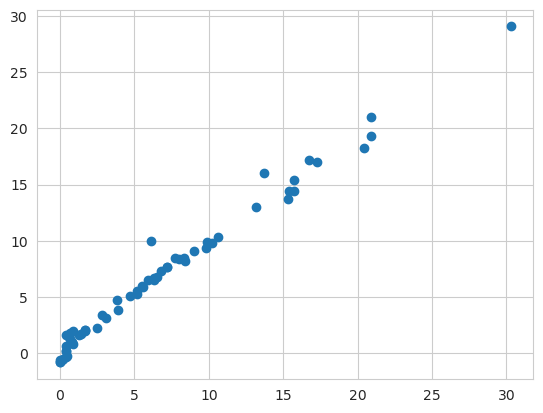

In [59]:
y_pred2 = lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred2)
plt.show()

In [60]:
mae_lassocv = mean_absolute_error(y_test,y_pred2)
r2_lassocv = r2_score(y_test,y_pred2)

print('MAE for Lasso Cross Validation: ', mae_lassocv)
print('R2 score for Lasso CV: ', r2_lassocv)

MAE for Lasso Cross Validation:  0.6199701158263436
R2 score for Lasso CV:  0.9820946715928274


## 🧠 Ridge Regression

Ridge Regression is a type of **regularized linear regression** that adds a penalty to the size of the coefficients to avoid overfitting.

### 📌 Objective Function

In Linear Regression, we minimize the sum of squared errors:

$$
J(\mathbf{w}) = \sum_{i=1}^{n} (y_i - \mathbf{w}^T \mathbf{x}_i)^2
$$

In Ridge Regression, we add an L2 penalty term:

$$
J(\mathbf{w}) = \sum_{i=1}^{n} (y_i - \mathbf{w}^T \mathbf{x}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2
$$

Where:
- $y_i$ is the target value
- $\mathbf{x}_i$ is the feature vector
- $\mathbf{w}$ are the model weights (coefficients)
- $\lambda$ is the **regularization strength** (also called alpha)

### 🤔 Why Use Ridge?

- Reduces **overfitting**
- Keeps **coefficients small**
- Useful when features are **correlated**
- Helps the model generalize better to new data

### 🧪 Notes

- When $\lambda = 0$, Ridge becomes **ordinary least squares**.
- When $\lambda$ is very large, coefficients approach **zero**, but never exactly zero.

> 💡 Ridge regression shrinks coefficients — it doesn't eliminate them.


In [61]:
from sklearn.linear_model import Ridge

In [62]:
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred3 = ridge.predict(x_test_scaled)

MAE for Ridge regression:  0.5642305340105683
R2 score for Ridge regression:  0.9842993364555513


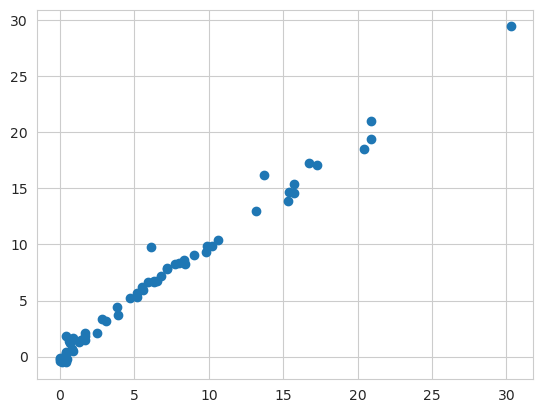

In [64]:
mae_ridge = mean_absolute_error(y_test,y_pred3)
r2_ridge = r2_score(y_test,y_pred3)

print('MAE for Ridge regression: ', mae_ridge)
print('R2 score for Ridge regression: ', r2_ridge)

plt.scatter(y_test,y_pred3)
plt.show()

In [65]:
## Ridge with Cross validation
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(x_train_scaled,y_train)
y_pred4 = ridge_cv.predict(x_test_scaled)



MAE for Ridge CV regression:  0.5642305340105683
R2 score for Ridge CV regression:  0.9842993364555513


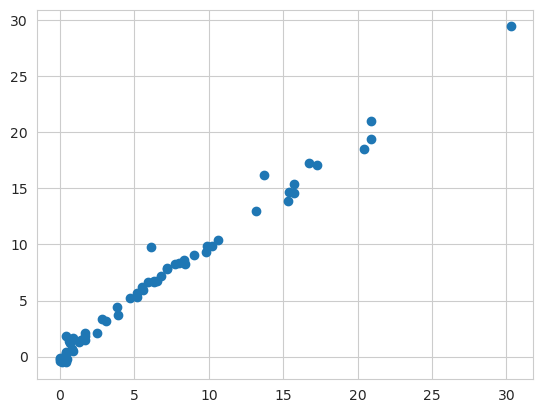

In [66]:
mae_ridgecv = mean_absolute_error(y_test,y_pred4)
r2_ridgecv = r2_score(y_test,y_pred4)
print('MAE for Ridge CV regression: ', mae_ridgecv)
print('R2 score for Ridge CV regression: ', r2_ridgecv)

plt.scatter(y_test,y_pred4)
plt.show()

In [67]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Pickle Machine Learning Models and Preprocessing model (Standard Scaler)

In [68]:
scaler

StandardScaler()

In [69]:
ridge

Ridge()

In [70]:
import pickle


In [71]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))